Que.Problem statement.

Build a recommender system by using cosine simillarties score.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

In [7]:
# Import the Data.
book=pd.read_csv(r"C:\Users\Admin\Downloads\book (1).csv", encoding= 'unicode_escape')

In [135]:
book.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [136]:
book.tail()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8
9999,10000,162129,Kids Say the Darndest Things,6


In [143]:
# Renaming the columns
book_new = book.rename({'User.ID':'user_id','Book.Title':'book_title','Book.Rating':'book_rating'},axis =1)
book_new.head()

,Unnamed: 0,user_id,book_title,book_rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [145]:
#Check of null values
book_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   user_id      10000 non-null  int64 
 2   book_title   10000 non-null  object
 3   book_rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [147]:
#unique users in the dataset.
len(book_new['user_id'].unique())

2182

In [150]:
#Checking Shape
book_new.shape

(10000, 4)

In [157]:
#No.of unique books in data
len(book_new['book_title'].unique())

9659

In [167]:
#Making the names of the books as the column names
book_df =book_new.pivot_table(index='user_id',
                                 columns='book_title',
                                 values='book_rating').reset_index(drop=True)
book_df.head()

book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
#Fill  the null values with 0.
book_df.fillna(0, inplace=True)
book_df

book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [186]:
C = book_new['book_rating'].mean()
print(C)

7.5663


In [195]:
m = book_new['book_rating'].quantile(0.90)
print(m)

10.0


In [203]:
# Create list of book.
q_Books = book_new.copy().loc[book_new['book_rating'] >= m]
q_Books.shape

(1732, 4)

In [208]:
# Use cosine function
uc_sim = 1 - pairwise_distances( book_df.values,metric='cosine')
uc_sim.shape

(2182, 2182)

In [217]:
uc_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [221]:
uc_sim[1]

array([0., 1., 0., ..., 0., 0., 0.])

In [230]:
uc_sim_df = pd.DataFrame(uc_sim)
uc_sim_df.index = book_new.user_id.unique()
uc_sim_df.columns = book_new.user_id.unique()

In [232]:
uc_sim_df.shape

(2182, 2182)

In [246]:
uc_sim_df.iloc[0:10, 0:10]

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
276747,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
276748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
276751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
276754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [271]:
u=book_new[(book_new['user_id']==276726) | (book_new['user_id']==16)]
u

,Unnamed: 0,user_id,book_title,book_rating
0,1,276726,Classical Mythology,5
2412,2413,16,Random Acts Of Management:A Dilbert Book,9


In [264]:
#Set user_1 with a particular user id
user_1=book_new[(book_new['user_id']==276726)] 
user_1

,Unnamed: 0,user_id,book_title,book_rating
0,1,276726,Classical Mythology,5


In [275]:
# Set user_2 with another user id
user_2=book_new[(book_new['user_id']==16)] 
user_2

,Unnamed: 0,user_id,book_title,book_rating
2412,2413,16,Random Acts Of Management:A Dilbert Book,9


In [290]:
indices = pd.Series(book_new.index, index=book_new['book_title']).drop_duplicates()

In [292]:
indices[:10]

book_title
Classical Mythology                                                                                   0
Clara Callan                                                                                          1
Decision in Normandy                                                                                  2
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It    3
The Mummies of Urumchi                                                                                4
The Kitchen God's Wife                                                                                5
What If?: The World's Foremost Military Historians Imagine What Might Have Been                       6
PLEADING GUILTY                                                                                       7
Under the Black Flag: The Romance and the Reality of Life Among the Pirates                           8
Where You'll Find Me: And Other Stories              

In [310]:
#Prepared the user defined function  by using cosine simillarties score.
def get_recommendations(book_title, cosine_sim=uc_sim):

    idx = indices[book_title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[0:11]

    books_indices = [i[0] for i in sim_scores]

    return book_new['book_title'].iloc[books_indices]

In [321]:
#Trying to find a book similar to Under the Black Flag: The Romance and the Reality of Life Among the Pirates 
a=get_recommendations('Under the Black Flag: The Romance and the Reality of Life Among the Pirates')
a

8     Under the Black Flag: The Romance and the Real...
0                                   Classical Mythology
1                                          Clara Callan
2                                  Decision in Normandy
3     Flu: The Story of the Great Influenza Pandemic...
4                                The Mummies of Urumchi
5                                The Kitchen God's Wife
6     What If?: The World's Foremost Military Histor...
7                                       PLEADING GUILTY
9               Where You'll Find Me: And Other Stories
10                          Nights Below Station Street
Name: book_title, dtype: object

In [334]:
#Trying to find a book similar to Classical Mythology
b=get_recommendations('Classical Mythology')
b

0                                   Classical Mythology
1                                          Clara Callan
2                                  Decision in Normandy
3     Flu: The Story of the Great Influenza Pandemic...
4                                The Mummies of Urumchi
5                                The Kitchen God's Wife
6     What If?: The World's Foremost Military Histor...
7                                       PLEADING GUILTY
8     Under the Black Flag: The Romance and the Real...
9               Where You'll Find Me: And Other Stories
10                          Nights Below Station Street
Name: book_title, dtype: object

In [346]:
#Add the user 1 and user 2 based on the book rating.
pd.merge(user_1,user_2,on='book_rating',how='outer')

,Unnamed: 0_x,user_id_x,book_title_x,book_rating,Unnamed: 0_y,user_id_y,book_title_y
0,1.0,276726.0,Classical Mythology,5,NaN,NaN,NaN
1,NaN,NaN,NaN,9,2413.0,16.0,Random Acts Of Management:A Dilbert Book


In [351]:
book_user_rating = book_df["You Don't Need Experience if You've Got Attitude"]  

In [358]:
book_user_rating

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2177    0.0
2178    0.0
2179    0.0
2180    0.0
2181    0.0
Name: You Don't Need Experience if You've Got Attitude, Length: 2182, dtype: float64

In [364]:
# Find the correlation
similar_to_book = book_df.corrwith(book_user_rating)

In [370]:
corr_book = pd.DataFrame(similar_to_book, columns=['Correlation'])
corr_book.dropna(inplace=True)
corr_book.head()

,Correlation
book_title,
"Jason, Madison &amp",-0.000459
Other Stories;Merril;1985;McClelland &amp,-0.000459
Repairing PC Drives &amp,-0.000459
'48,-0.000459
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000459


In [381]:
# View the books based on the highly correlated book.
corr_book[corr_book['Correlation'] > 0].sort_values(by='Correlation', ascending=False).head(10)  

,Correlation
book_title,
Conversations With Dogbert: A Dilbert Book,1.0
"The Boss: Nameless, Blameless and Shameless (Adams, Scott, Dilbert Book,)",1.0
The Dilbert Bunch: A Dilbert Book (Main Street Editions),1.0
You Don't Need Experience if You've Got Attitude,1.0


In [389]:
ratings_mean_count = pd.DataFrame(book_new.groupby('book_title')['book_rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(book_new.groupby('book_title')['book_rating'].count())

<AxesSubplot:>

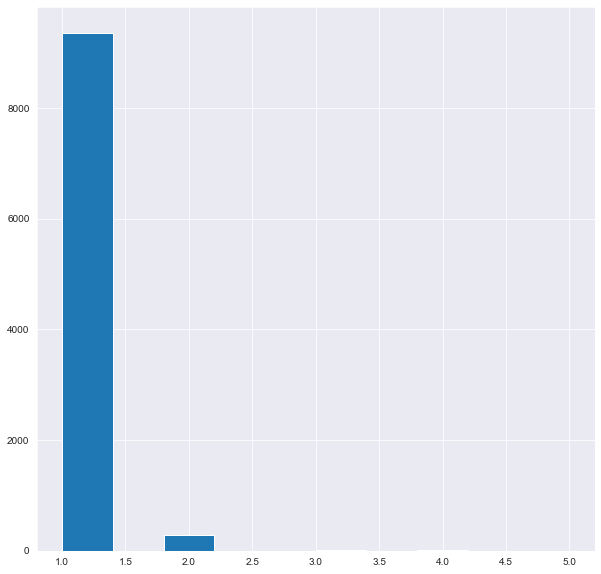

In [398]:
#Plot a graph.
sns.set_style('dark')
%matplotlib inline
plt.figure(figsize=(10,10))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=10)

<AxesSubplot:>

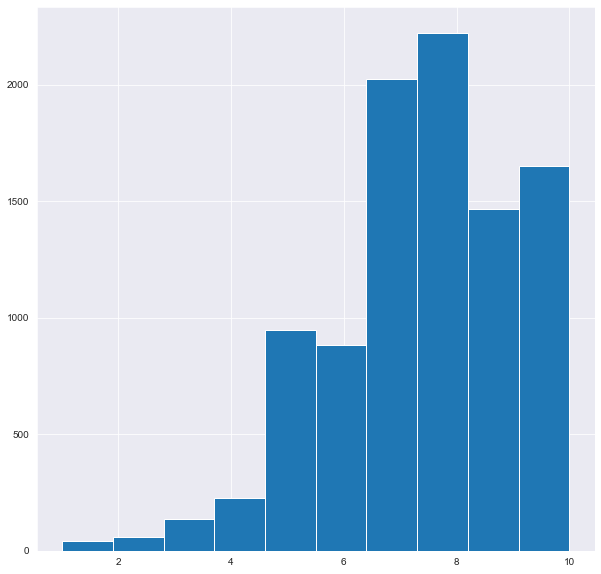

In [404]:
#Plot a graph to Show the book rating.
plt.figure(figsize=(10,10))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['book_rating'].hist(bins=10)

<Figure size 576x432 with 0 Axes>

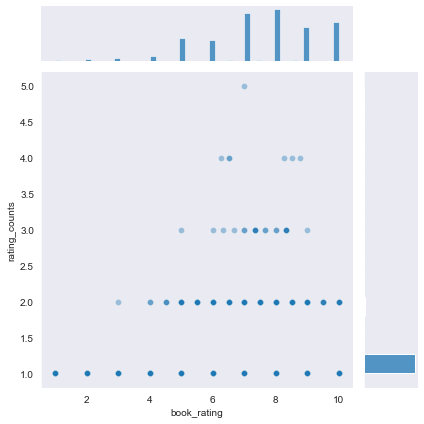

In [425]:
# Plote graph to visualise the book rating and rating counts at the same time.
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='book_rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

From the output, it is evident that the Books that have high correlation are not very well known.
